In [1]:
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt
from pandas.tools.plotting import table
from __future__ import division
import seaborn as sns
import numpy as np

In [2]:
cols = ['frame_number', 'gender', 'emotion', 'year', 'movie_name']
df = pd.read_csv('/home/mayank/Desktop/gender-bias-detection/data/data.csv', sep = ',')

In [3]:
df.head()

,frame_number,gender,emotion,year,movie_name
0,28,woman,happy,2014,dedh_ishqiya
1,62,woman,happy,2014,dedh_ishqiya
2,60,man,angry,2014,dedh_ishqiya
3,60,man,sad,2014,dedh_ishqiya
4,60,man,angry,2014,dedh_ishqiya


In [4]:
df_woman = df.loc[df['gender'] == 'woman']
df_man = df.loc[df['gender'] == 'man']
df_woman = df_woman.loc[df['emotion'] != 'neutral']
df_man = df_man.loc[df['emotion'] != 'neutral']

womanframesperyear = df_woman.groupby(by=['year'])['frame_number'].count().to_frame(name = 'count').reset_index()
manframesperyear = df_man.groupby(by=['year'])['frame_number'].count().to_frame(name = 'count').reset_index()

In [5]:
res_woman = df_woman.groupby(by=['emotion'])['frame_number'].count()
res_woman=res_woman.to_frame(name = 'count').reset_index()
labels=res_woman['emotion'].tolist()
#res_woman

res_man = df_man.groupby(by=['emotion'])['frame_number'].count()
res_man=res_man.to_frame(name = 'count').reset_index()
labels=res_man['emotion'].tolist()
#res_man

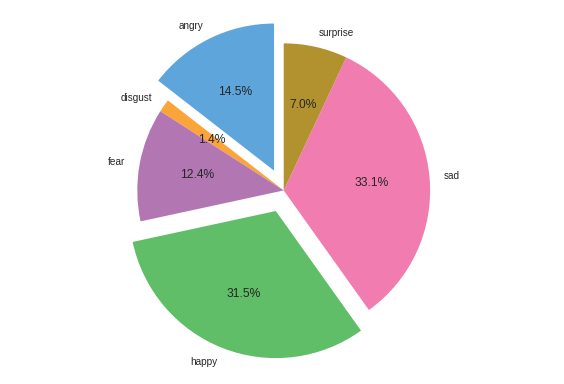

In [6]:
plt.rcParams.update({'font.size': 12})

colors = ['#5DA5DA', '#FAA43A', '#B276B2', '#60BD68', '#F17CB0', '#B2912F', '#DECF3F']
#colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

plt.pie(res_woman['count'],labels=res_woman['emotion'], shadow=False, colors=colors, explode=(0.15, 0, 0, 0.15, 0, 0),
    startangle=90,
    autopct='%1.1f%%')

plt.axis('equal')

# View the plot
plt.tight_layout()
#plt.show()
plt.savefig('pie_chart_emotions_woman.png')

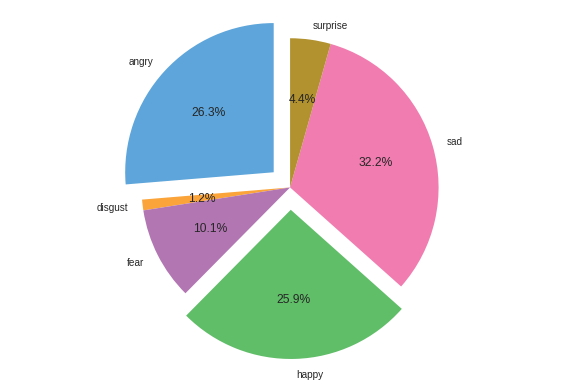

In [7]:

plt.rcParams.update({'font.size': 12})

plt.pie(res_man['count'],labels=res_man['emotion'], shadow=False, colors=colors, explode=(0.15, 0, 0, 0.15, 0, 0),
    startangle=90,
    autopct='%1.1f%%')

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()

#plt.show()

plt.savefig('pie_chart_emotions_man.png')

In [8]:
year_woman = df_woman.groupby(by=['emotion','year'])['frame_number'].count()
for emotion in res_woman['emotion']:
    ym = year_woman[emotion].to_frame(name = emotion+'emotioncount').reset_index()
    womanframesperyear = pd.merge(womanframesperyear,ym, on ='year')
    womanframesperyear[emotion] = womanframesperyear[emotion+'emotioncount']*1.0/womanframesperyear['count']*100
womanframesperyear.head()

,year,count,angryemotioncount,angry,disgustemotioncount,disgust,fearemotioncount,fear,happyemotioncount,happy,sademotioncount,sad,surpriseemotioncount,surprise
0,2008,309,36,11.650485,3,0.970874,25,8.090615,101,32.686084,120,38.834951,24,7.766990
1,2009,280,40,14.285714,3,1.071429,25,8.928571,81,28.928571,110,39.285714,21,7.500000
2,2010,562,87,15.480427,4,0.711744,69,12.277580,176,31.316726,198,35.231317,28,4.982206
3,2011,755,86,11.390728,15,1.986755,91,12.052980,242,32.052980,268,35.496689,53,7.019868
4,2012,521,66,12.667946,13,2.495202,68,13.051823,173,33.205374,158,30.326296,43,8.253359


In [9]:
df_w = womanframesperyear.drop('count', axis=1)
del df_w['angryemotioncount']
del df_w['disgustemotioncount']
del df_w['fearemotioncount']
del df_w['happyemotioncount']
del df_w['sademotioncount']
del df_w['surpriseemotioncount']
df_w.head()

df_w_new = df_w
df_w_new.columns = ['year', 'woman_angry', 'woman_disgust', 'woman_fear', 'woman_happy', 'woman_sad', 'woman_surprise']


del df_w_new['woman_disgust']
del df_w_new['woman_fear']
del df_w_new['woman_surprise']


In [10]:
year_man = df_man.groupby(by=['emotion','year'])['frame_number'].count()
for emotion in res_man['emotion']:
    ym = year_man[emotion].to_frame(name = emotion+'emotioncount').reset_index()
    manframesperyear = pd.merge(manframesperyear,ym, on ='year')
    manframesperyear[emotion] = manframesperyear[emotion+'emotioncount']*1.0/manframesperyear['count']*100
manframesperyear.head()

,year,count,angryemotioncount,angry,disgustemotioncount,disgust,fearemotioncount,fear,happyemotioncount,happy,sademotioncount,sad,surpriseemotioncount,surprise
0,2008,639,153,23.943662,4,0.625978,52,8.137715,175,27.386541,230,35.993740,25,3.912363
1,2009,677,192,28.360414,5,0.738552,59,8.714919,164,24.224520,231,34.121123,26,3.840473
2,2010,1210,305,25.206612,21,1.735537,139,11.487603,306,25.289256,395,32.644628,44,3.636364
3,2011,1480,331,22.364865,18,1.216216,155,10.472973,381,25.743243,544,36.756757,51,3.445946
4,2012,1232,334,27.110390,13,1.055195,102,8.279221,366,29.707792,359,29.139610,58,4.707792


In [11]:
df_m = manframesperyear.drop('count', axis=1)
del df_m['angryemotioncount']
del df_m['disgustemotioncount']
del df_m['fearemotioncount']
del df_m['happyemotioncount']
del df_m['sademotioncount']
del df_m['surpriseemotioncount']
df_m.head()

df_m_new = df_m
df_m_new.columns = ['year', 'man_angry', 'man_disgust', 'man_fear', 'man_happy', 'man_sad', 'man_surprise']

del df_m_new['man_disgust']
del df_m_new['man_fear']
del df_m_new['man_surprise']


In [12]:
df_common = pd.merge(df_m_new, df_w_new, on= 'year')
df_common.head()

,year,man_angry,man_happy,man_sad,woman_angry,woman_happy,woman_sad
0,2008,23.943662,27.386541,35.993740,11.650485,32.686084,38.834951
1,2009,28.360414,24.224520,34.121123,14.285714,28.928571,39.285714
2,2010,25.206612,25.289256,32.644628,15.480427,31.316726,35.231317
3,2011,22.364865,25.743243,36.756757,11.390728,32.052980,35.496689
4,2012,27.110390,29.707792,29.139610,12.667946,33.205374,30.326296


AttributeError: 'Legend' object has no attribute 'set_xlabel'

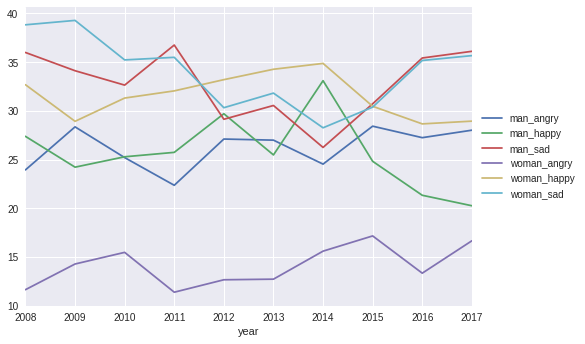

In [16]:
y_labels = ['man_angry', 'man_happy', 'man_sad', 'woman_angry', 'woman_happy', 'woman_sad']
ax = df_common.plot.line(x = 'year', y = y_labels).legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Frames")

fig = f.get_figure()

fig = ax.get_figure()

ax2 = plt.axes()

ax2.set_ylabel('Percentage')
ax2.set_xlabel('Year')

fig.savefig('yearwise_malevsfemale.png', bbox_inches='tight')
fig.savefig('selected_woman_man_emotions_over_years.png')

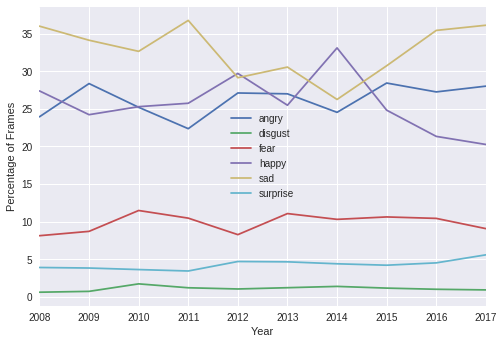

In [15]:
y_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']
ax = df_m.plot.line(x = 'year', y = y_labels)
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Frames")

fig = ax.get_figure()

fig.savefig('man_emotions_over_years.png')

In [15]:
ax = df_w.plot.line(x = 'year', y = y_labels)
#f.set_ylabel('Percentage')
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Frames")
fig = ax.get_figure()

fig.savefig('woman_emotions_over_years.png')

KeyError: "['man_angry' 'man_happy' 'man_sad'] not in index"